## Tarea 2 - Física Computacional
**Román Tamez Vidal Tamayo Tamez** - (tamoaltas)

In [4]:
import math as m
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [51]:
import matplotlib
matplotlib.rcParams.update(
    {
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
        "axes.unicode_minus": False,
        "font.size": 12,
        "pgf.preamble": "\n".join([ # Aún más formato
        r"\usepackage[utf8]{inputenc}",
        r"\usepackage[T1]{fontenc}",
        ])
    }
)

### Problema 1
Genere una función que calcule derivadas e integrales numéricas que consideren una precisión en la que se desprecien términos iguales o mayores a $h^5$ en el espaciado de la malla en el dominio de la función. Muestre que sus funciones trabajan bien con un ejemplo en el cual calcule su derivada e integral de forma analítica.

#### Derivada simétrica con $h^4$

$$
 f'(x_i) \approx \frac{1}{12 h} \left(-f(x_{i+2}) + 8 f(x_{i+1}) - 8 f(x_{i-1}) + f(x_{i-2}) \right) 
$$

Puntos iniciales $i=0,1$

$$
 f'(x_{i}) \approx \frac{1}{12 h} \left( -25 f(x_{i}) + 48 f(x_{i+1}) - 36 f(x_{i+2} + 16 f(x_{i+3}) - 3 f(x_{i+4})  \right)
$$

$$
 f'(x_{N}) \approx -\frac{1}{x_{N} - x_{N-1}} \left( -\frac{1}{2}f(x_{N-2}) + f(x_{N-1}) - \frac{3}{2}f(x_{N})  \right)
$$

Puntos finales $i=N,N-1$

In [52]:
def derivada_h4(f, x):
    h_12, df = 12*(x[1] - x[0]), np.zeros_like(f)
    for i in range(2,len(x)-2):
        df[i] = - f[i+2] + 8*f[i+1] - 8*f[i-1] + f[i-2]

    df[0] = -25*f[0] + 48*f[1] - 36*f[2] + 16*f[3] - 3*f[4]
    df[1] = -25*f[1] + 48*f[2] - 36*f[3] + 16*f[4] - 3*f[5]
    
    df[-1] = 25*f[-1] - 48*f[-2] + 36*f[-3] - 16*f[-4] + 3*f[-5]
    df[-2] = 25*f[-2] - 48*f[-3] + 36*f[-4] - 16*f[-5] + 3*f[-6]

    return df / h_12

Integral
$$
 \int_{x_i-h}^{x_i + h} f(x) \, dx \approx \frac{f(x_{i-1})+4f(x_{i})+f(x_{i-1})}{3}h
$$

parte asimétrica

$$
 \int_{x_0}^{x_0 + h} f(x) \, dx \approx \frac{23 f(x_{0})+ 26f(x_{1}) - 4f(x_{2}) + 6f(x_{3}) - 3f(x_{4}) }{48}h
$$

In [53]:
def integrar(f, x):
    '''
    Regresa la integral de la función, no la primitiva
    
    int_f = Acumulador de las integrales de cada 2 intervalos
    N = Número de intervalos de integración [x_i, x_i+h]
    '''
    int_f, N, h = 0, len(f)-1, abs(x[0] - x[1])

    if len(f) < 5:
        raise Exception("Perdón, ingresa una 'f' con al menos 5 valores") 

    for i in range(1,N,2):
        int_f += f[i+1] + 4*f[i] + f[i-1]

    int_f = int_f*h/3.0
    
    if N % 2 == 1:
        # Numero impar de intervalos [x_i, x_i+h]
        int_f += -(23*f[-1] + 26*f[-2] - 4*f[-3] + 6*f[-4] -3*f[-5])*h/48.0 

    return int_f

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

$$
f'(x) = -\frac{x - \mu}{\sigma^2} f(x)
$$

$$
\int f(x)dx = \frac{1}{2} \operatorname{erf} \left( \frac{x - \mu}{\sqrt{2} \sigma} \right) + C
$$

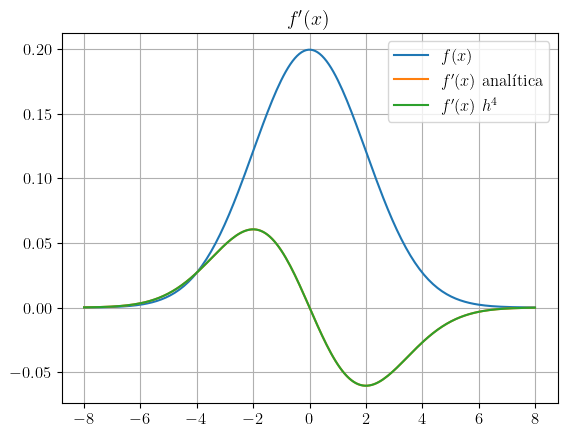

In [54]:
mu = 0
sigma = 2

x = np.linspace(-8,8,200)
y = sp.stats.norm.pdf(x,mu,sigma)

dy = -(x - mu)/(sigma**2) * y
dy_h4 = derivada_h4(y,x)

plt.title(r"$f'(x)$")
plt.plot(x,y ,label=r"$f(x)$")
plt.plot(x,dy ,label=r"$f'(x)$ analítica")
plt.plot(x,dy_h4, label=r"$f'(x)$ $h^4$")
plt.grid(), plt.legend(),
plt.show()

In [55]:
x = np.linspace(-2,2,6000)
y = sp.stats.norm.pdf(x,mu,sigma)

def integral_gauss(a,b):
    a = (a-mu)/(np.sqrt(2)*sigma)
    b = (b-mu)/(np.sqrt(2)*sigma)
    return 0.5*(sp.special.erf(b)-sp.special.erf(a))

print(integral_gauss(-2,2), integrar(y,x))



0.6826894921370859 0.6825281245360618


### Problema 2

Calcule la derivada analítica de las siguientes funciones:


* $f(x) = e^{-(x/2)^4} \cos(4x)$ con $x \in [-5, 5]$.
* $g(x) = -\frac{2}{x^6} + \frac{1}{x^{12}}$ con $x \in [0.5, 5]$.

Realice las gráficas de las funciones y sus primeras dos derivadas. Utilizando los algoritmos vistos en clase (los que desprecian términos mayores a $O(h^2)$), encuentre la derivada numérica de dichas funciones con error menor a $10^{-4}$ para cualquier punto al comparar con las derivadas analíticas.

También realice una comparación utilizando la función derivada del problema anterior. Es decir, haga una gráfica en la que se muestre $|f'_\text{analítica}(x) - f'_\text{h2}(x)|$ y $|f'_\text{analítica}(x) - f'_\text{h4}(x)|$, así como para las segundas derivadas, y muestre que el error es menor a $10^{-4}$ en todo el intervalo con su valor de $h$ respectivo.

In [56]:
def f(x):
    return np.exp(- (x / 2) ** 4) * np.cos(4 * x)
def g(x):
    return -2 / x**6 + 1 / x**12

Para la primera función:
$$
f'(x) = -4 e^{-\frac{x^2}{4}} \sin (4 x)-\frac{1}{2} e^{-\frac{x^2}{4}} x \cos (4 x)
$$

$$
f''(x) = 4 e^{-\frac{x^2}{4}} x \sin (4 x)-16 e^{-\frac{x^2}{4}} \cos (4 x)+\left(\frac{1}{4} e^{-\frac{x^2}{4}}
   x^2-\frac{1}{2} e^{-\frac{x^2}{4}}\right) \cos (4 x)
$$
Para la segunda: 
$$
f'(x) = \frac{12}{x^7}-\frac{12}{x^{13}}
$$
$$
f''(x) = \frac{156}{x^{14}}-\frac{84}{x^8}
$$


In [60]:
def f_prima(x):
    return -4 * np.exp(-x**2 / 4) * np.sin(4 * x) - (1/2) * np.exp(-x**2 / 4) * x * np.cos(4 * x)

def f_bi_prima(x):
    return (4 * np.exp(-x**2 / 4) * x * np.sin(4 * x) - 16 * np.exp(-x**2 / 4) * np.cos(4 * x) +
            ((1/4) * np.exp(-x**2 / 4) * x**2 - (1/2) * np.exp(-x**2 / 4)) * np.cos(4 * x))

def g_prima(x):
    return 12 / x**7 - 12 / x**13

def g_bi_prima(x):
    return 156 / x**14 - 84 / x**8

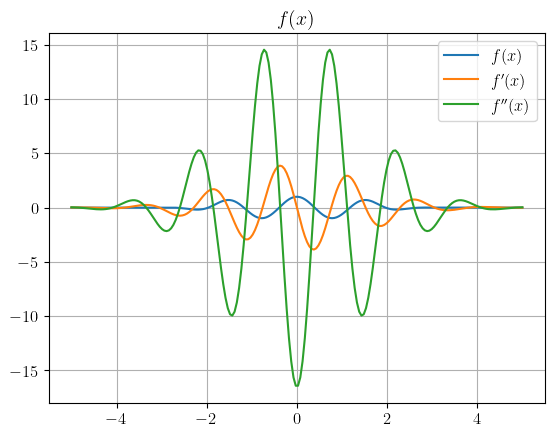

In [66]:
x = np.linspace(-5,5,200)
yFF = f(x)

dyFF = f_prima(x)
ddyFF = f_bi_prima(x)

plt.title(r"$f(x)$")
plt.plot(x,yFF ,label=r"$f(x)$")
plt.plot(x,dyFF ,label=r"$f'(x)$")
plt.plot(x,ddyFF, label=r"$f''(x)$")
plt.grid(), plt.legend(),
plt.show()

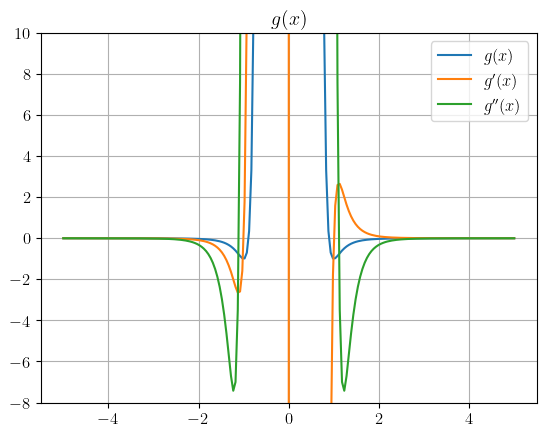

In [67]:
x = np.linspace(-5,5,200)
yGG = g(x)

dyGG = g_prima(x)
ddyGG = g_bi_prima(x)

plt.title(r"$g(x)$")
plt.plot(x,yGG ,label=r"$g(x)$")
plt.plot(x,dyGG ,label=r"$g'(x)$")
plt.plot(x,ddyGG, label=r"$g''(x)$")
plt.ylim(-8,10)
plt.grid(), plt.legend(),
plt.show()

#### Derivada simétrica con $h^2$

In [95]:
def derivada_h2(f, x):
    h_2, df = abs(x[2] - x[0]), np.zeros_like(f)
    print(h_2, x[2], x[0])
    for i in range(1,len(x)-1):
        df[i] = f[i+1] - f[i-1]

    # Nótese que se multiplicaron los coefs anteriores por 2 porque la ec. de arriba divide por 2h
    df[0] = -f[2] + 4*f[1] - 3*f[0]
    df[-1] = f[-3] - 4*f[-2] + 3*f[-1]
    return df / h_2

1e-05
2.0000020000132678888e-05 -4.9999799999799998673 -5.0
Max err: 0.72373108521106927003


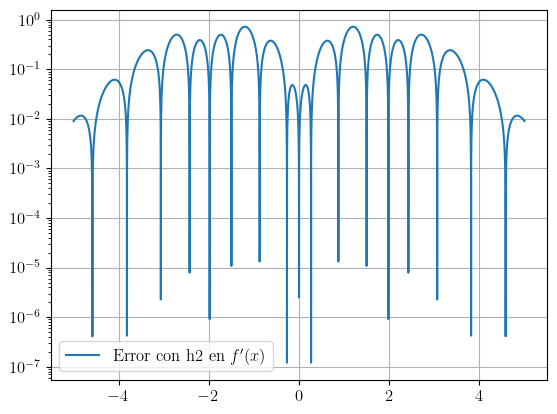

In [100]:
x_min, x_max = -5,5
n_hs = 1000000
h = (x_max - x_min)/n_hs
print(h)

x = np.linspace(x_min,x_max,n_hs,dtype='float128')
# Analíticas
yFF = f(x)
dyFF = f_prima(x)

# Numéricas
dyFF_h2 = derivada_h2(yFF, x)
error_dFF_h2 = abs(dyFF - dyFF_h2)

print('Max err:', error_dFF_h2.max())

plt.semilogy(x,error_dFF_h2 , label=r"Error con h2 en $f'(x)$")
plt.grid(), plt.legend(),
plt.show()


In [ ]:
error_h2 = abs(dy - dy_h2)
error_h4 = abs(dy - dy_h4)
print('Max err:', error_h2.max(), error_h4.max())

plt.semilogy(x,error_h2, label='Error con h2')
plt.semilogy(x,error_h4, label='Error con h4')
plt.grid(), plt.legend(),
plt.show()